# $\Lambda_b$ Reconstruction 

### Task

* Using the new data files, construct a histogram of the mass of the lambda_b by adding the four vectors of the pion, kaon, proton, muon, neutrino (stored as electrons in the code) 
    * This should have a peak 
* Construct a histogram of the mass of the lambda_b by adding the four vectors of the pion kaon, proton, and muon 
    * This should be a blob

$$\Lambda_b^0 \rightarrow \pi^+ + K^- + p + \mu^- + \nu$$

$\Lambda_b^0$ - is a hadron, but more specifically a baryon
* Mass = 5.620 GeV
* Composition = up + down + bottom quark
* Decays into a pion, kaon, proton, muon, and neutrino

$\pi^+$ is a pion or pi meson
* Made up of an up and anti-down quark
* Mass = 0.1395 GeV
* Pions are the lightest mesons, composed of the lightest quarks (up and down)
* Mean lifetime is 26 nanoseconds
* Charged pions most often decay into muons and muon neutrinos, and neutral pions into gamma rays

$K^-$ is the anti-particle of the Kaon or K Meson
* Mass = 0.494 GeV
* Composition = anti-up + strange quark

$p$ is a hadron, but more specifically a baryon composed of three quarks
* Mass = 0.93827 GeV
* Composition = 2 up + 1 down quark

$\mu^-$ is an unstable subatomic particle, classified as a lepton
* Mass = 0.105658 GeV
* Muon decay always produces at least three particles, which must include an electron of the same charge as the muon and two neutrinos of different types
* The muon is not believed to have any sub-structure (composed of any simpler particles) like that of all leptons

$\nu$ is a lepton
* Mass = $3.20 x 10^-10 GeV$
* Composition = elementary particle
* They are the only identified candidate for dark matter, specifically hot dark matter
* The majority of neutrinos in the vicinity of the Earth are from nuclear reactions in the Sun.
* Neutrinos come in three flavors:
    * $\nu_e$ - electron neutrinos
    * $\nu_\mu$ - muon neutrino
    * $\nu_\tau$ - tau neutrinos

In [12]:
import lhcb_tools as lhcb
import lichen.lichen as lch
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

In [13]:
from math import sqrt
def mass(p4):
    E,px,py,pz = p4[0:4]
    m1 = (E**2-(px**2+py**2+pz**2))
    if m1>=0:
        return sqrt(m1)
    else:
        return sqrt(-m1)

def add_4_vecs(p4s):
    E,px,py,pz = (0,0,0,0)

    for p4 in p4s:
        E += p4[0]
        px += p4[1]
        py += p4[2]
        pz += p4[3]

    p4tot = [E,px,py,pz]    
    return p4tot

collision count:  0
collision count:  1000


<IPython.core.display.Javascript object>


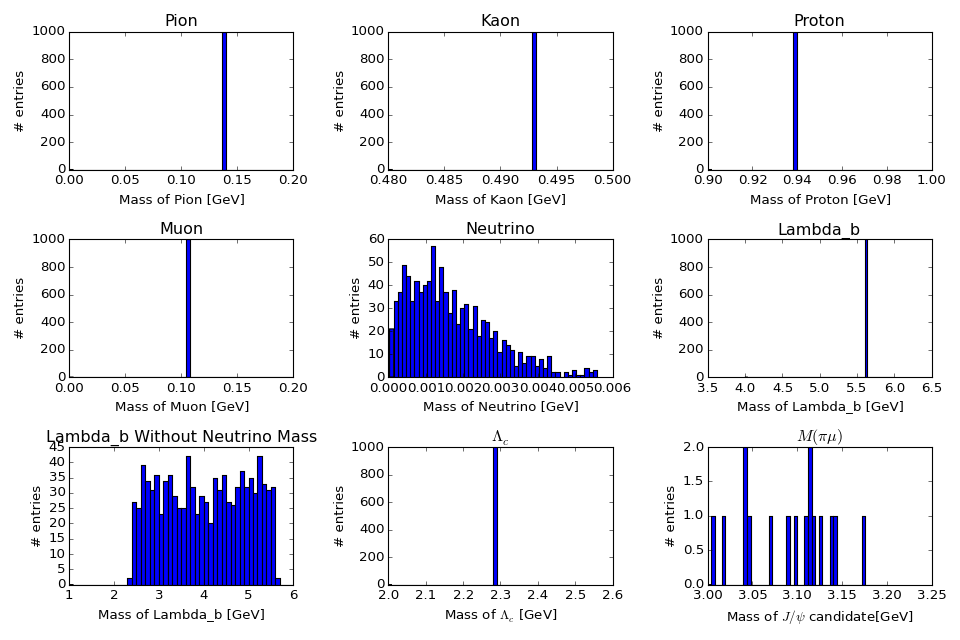

In [19]:
infile = open("ToyMC_LHCb_BtoLambdacmunu.dat",'r')
#infile = open('ToyMC_LHCb_BtoLambdacmunu_5MeV_resolution.dat')

npions = []
nkaons = []
nprotons = []
nmuons = []
nneutrinos = []

pion_mass = []
kaon_mass = []
proton_mass = []
muon_mass = []
neutrino_mass = [] # Neutrinos are stored as electrons (charge = 0)
lambda_b_mass1 = []
lambda_b_mass2 = []
lambda_c_mass = []
jpsi_mass = [] # This is not real


collisions = lhcb.get_collisions(infile,True)
#print collisions

for collision in collisions:
    
    pions,kaons,protons,muons,neutrinos,photons = collision
    
    npions.append(len(pions))
    nkaons.append(len(kaons))
    nprotons.append(len(protons))
    nmuons.append(len(muons))
    nneutrinos.append(len(neutrinos))
    
    for i in range(0,len(pions)):
        p40 = pions[i][0:4]
        q0 = pions[i][4]
        mpion = mass(p40)
        pion_mass.append(mpion)
        pionp4 = add_4_vecs([p40])
        
        for j in range(0,len(kaons)):
            p41 = kaons[j][0:4]
            q1 = kaons[j][4]
            mkaon = mass(p41)
            kaon_mass.append(mkaon)
            kaonp4 = add_4_vecs([p41])
            
            for k in range(len(protons)):
                p42 = protons[k][0:4]
                q2 = protons[k][4]
                mproton = mass(p42)
                proton_mass.append(mproton)
                protonp4 = add_4_vecs([p42])
                
                for l in range(len(muons)):
                    p43 = muons[l][0:4]
                    q3 = muons[l][4]
                    mmuon = mass(p43)
                    muon_mass.append(mmuon)
                    muonp4 = add_4_vecs([p43])
                
                    for m in range(len(neutrinos)):
                        p44 = neutrinos[m][0:4]
                        q4 = neutrinos[m][4]
                        mneutrino = mass(p44)
                        neutrino_mass.append(mneutrino)
                        neutrinop4 = add_4_vecs([p44])
                    
                        if q0 == q2 and q1 == q3:
                            lbp4_1 = add_4_vecs([p40,p41,p42,p43,p44])
                            lbp4_2 = add_4_vecs([p40,p41,p42,p43])
                            lc = add_4_vecs([p40,p41,p42])
                            jpsi = add_4_vecs([p40,p43]) # Fake!
                            mlambda_b1 = mass(lbp4_1)
                            mlambda_b2 = mass(lbp4_2)
                            mlambda_c = mass(lc)
                            mjpsi = mass(jpsi) # Fake!
                            lambda_b_mass1.append(mlambda_b1)   
                            lambda_b_mass2.append(mlambda_b2)
                            lambda_c_mass.append(mlambda_c)
                            jpsi_mass.append(mjpsi)
                            
plt.figure(figsize=(12,8))
plt.subplot(3,3,1)
plt.hist(pion_mass,bins=50,range=(0,0.2))
plt.xlabel('Mass of Pion [GeV]')
plt.ylabel('# entries')
plt.title('Pion')  

plt.subplot(3,3,2)
plt.hist(kaon_mass,bins=50,range=(0.48,0.5))
plt.xlabel('Mass of Kaon [GeV]')
plt.ylabel('# entries')
plt.title('Kaon')

plt.subplot(3,3,3)
plt.hist(proton_mass,bins=50,range=(0.9,1))
plt.xlabel('Mass of Proton [GeV]')
plt.ylabel('# entries')
plt.title('Proton') 

plt.subplot(3,3,4)
plt.hist(muon_mass,bins=50,range=(0,0.2))
plt.xlabel('Mass of Muon [GeV]')
plt.ylabel('# entries')
plt.title('Muon')

plt.subplot(3,3,5)
plt.hist(neutrino_mass,bins=50)
plt.xlabel('Mass of Neutrino [GeV]')
plt.ylabel('# entries')
plt.title('Neutrino') 

plt.subplot(3,3,6)
plt.hist(lambda_b_mass1,bins=50,range=(4,6))
plt.xlabel('Mass of Lambda_b [GeV]')
plt.ylabel('# entries')
plt.title('Lambda_b') 

plt.subplot(3,3,7)
plt.hist(lambda_b_mass2,bins=50,range=(1,6))
plt.xlabel('Mass of Lambda_b [GeV]')
plt.ylabel('# entries')
plt.title('Lambda_b Without Neutrino Mass')


plt.subplot(3,3,8)
plt.hist(lambda_c_mass,bins=50,range=(2,2.5))
plt.xlabel(r'Mass of $\Lambda_c$ [GeV]')
plt.ylabel('# entries')
plt.title(r'$\Lambda_c$')


plt.subplot(3,3,9)
plt.hist(jpsi_mass,bins=50,range=(3,3.2))
plt.xlabel(r'Mass of $J/\psi$ candidate[GeV]')
plt.ylabel('# entries')
plt.title(r'$M(\pi \mu)$')

plt.tight_layout()